# Customer Segmentation
Dataset used in this example is publicly available in https://www.kaggle.com/datasets/vetrirah/customer/data

This collection of Python scripts represents a comprehensive approach to customer segmentation, leveraging advanced data preprocessing, exploratory data analysis (EDA), and machine learning techniques to identify distinct groups within a dataset of customer information. The codebase is meticulously designed to handle various data types, manage missing values, and explore underlying patterns through visualizations and statistical analysis. An interesting feature of this work is the implementation of an ensemble machine learning model, combining the strengths of XGBoost and Random Forest classifiers through a VotingClassifier. This ensemble model is fine-tuned using GridSearchCV, a process that meticulously searches through a predefined parameter space to identify the optimal settings for each algorithm. Notably, this fine-tuning process has demonstrated a intersting improvement in model accuracy over a logistic regression model, enhancing performance by 4%. This achievement underscores the effectiveness of ensemble methods and hyperparameter optimization in tackling complex machine learning problems, providing valuable insights into customer segmentation that can drive targeted marketing strategies and business decisions.


In [31]:
import os

In [32]:
import pandas as pd

In [39]:
import pandas as pd
import logging

# Configure logging
logging.basicConfig(filename='data_preprocessing.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_data(file_path):
    """
    Load the dataset from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        logging.info("Data loaded successfully.")
        return df
    except FileNotFoundError:
        logging.error(f"File not found at '{file_path}'")
        raise FileNotFoundError(f"File not found at '{file_path}'")
    except Exception as e:
        logging.error(f"An error occurred while loading data: {str(e)}")
        raise Exception(f"An error occurred while loading data: {str(e)}")

def preprocess_and_clean_data(df):
    """
    Preprocess and clean a DataFrame with 10 features and 8000 individuals.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    pd.DataFrame: A cleaned and preprocessed DataFrame.
    """
    try:
        # Remove duplicates if any
        df = df.drop_duplicates()

        # Handle missing values (you can customize this based on your data)
        df = df.fillna(df.select_dtypes(include=['number']).mean(numeric_only=True)) # Fill missing values with mean

        # Remove outliers (you can customize this based on your data)
        # Example: Remove rows where a specific feature is beyond a certain threshold
        # df = df[df['feature_name'] < threshold]

        # Encode categorical variables if needed (e.g., one-hot encoding)
        # Example: df = pd.get_dummies(df, columns=['categorical_feature'])

        # Standardize/normalize numerical features if needed
        # Example: df['numeric_feature'] = (df['numeric_feature'] - df['numeric_feature'].mean()) / df['numeric_feature'].std()

        # Feature engineering (create new features if needed)

        # Drop unnecessary columns if any
        # Example: df.drop(['unnecessary_feature1', 'unnecessary_feature2'], axis=1, inplace=True)

        logging.info("Data preprocessing and cleaning completed.")
        return df
    except Exception as e:
        logging.error(f"An error occurred during data preprocessing and cleaning: {str(e)}")
        raise Exception(f"An error occurred during data preprocessing and cleaning: {str(e)}")

if __name__ == "__main__":
    try:
        # Load the dataset
        df_train = load_data("sample_data/Train.csv")

        # Preprocess and clean the data
        df_cleaned_preprocessed = preprocess_and_clean_data(df_train.copy())

        # You can further process or analyze the cleaned data here or save it to a new file.
    except Exception as e:
        logging.error(f"An error occurred: {str(e)}")


In [40]:
df_cleaned_preprocessed.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 756.4+ KB


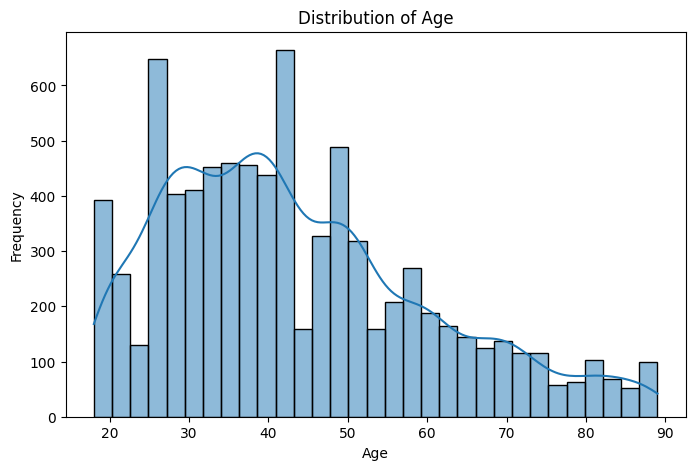

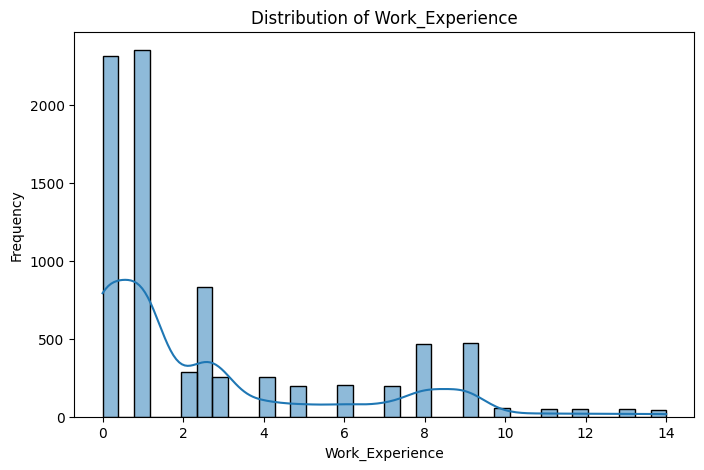

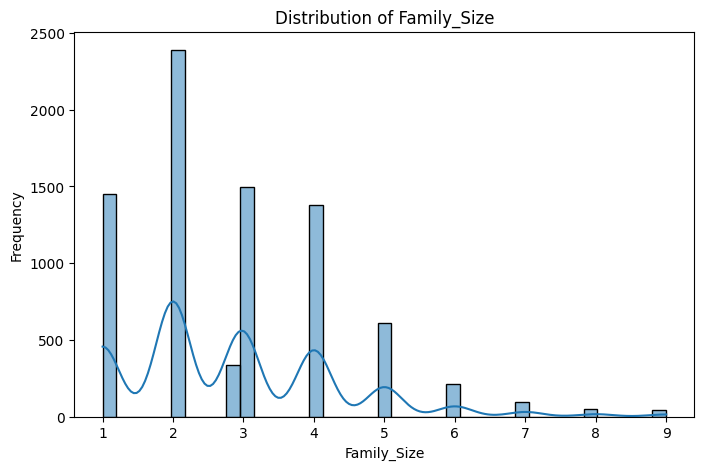

<ipython-input-41-32b2c422f05f>:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)


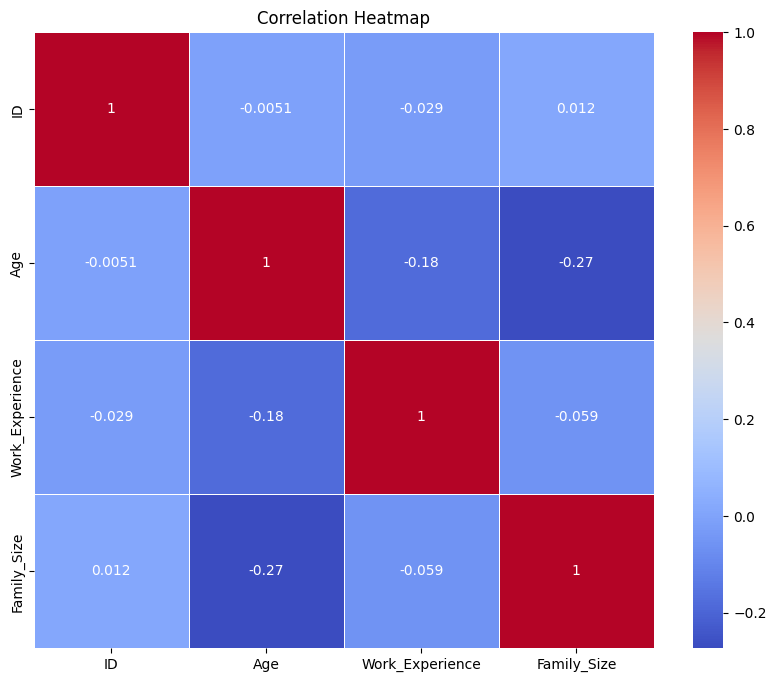

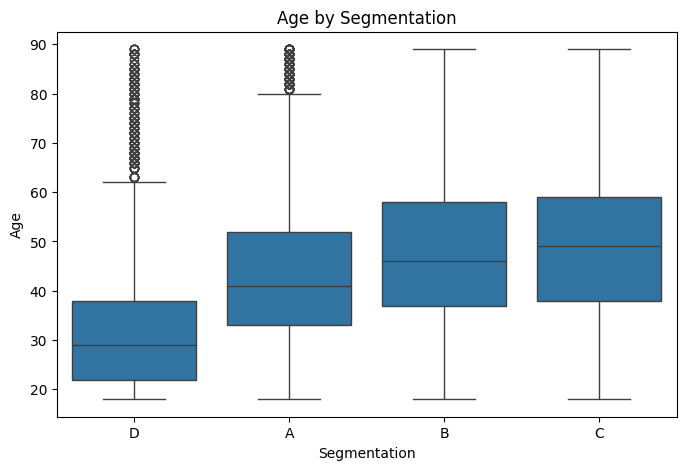

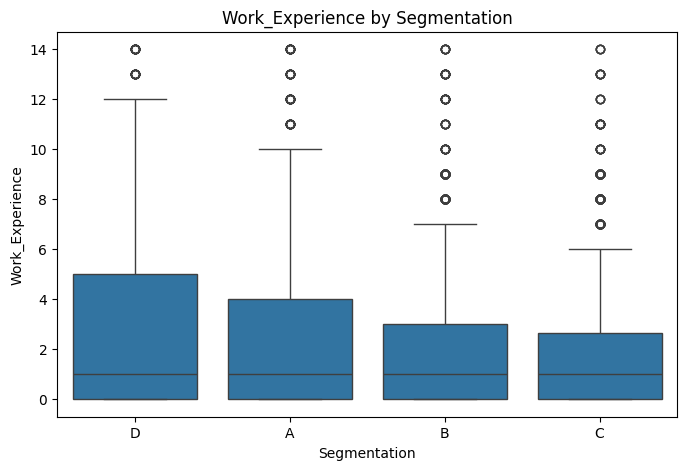

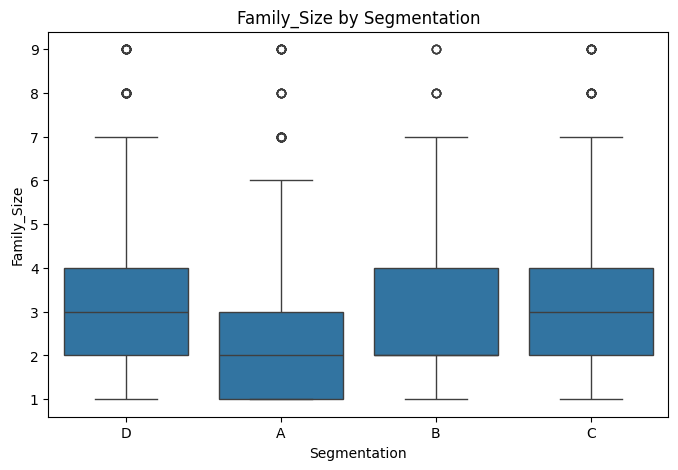

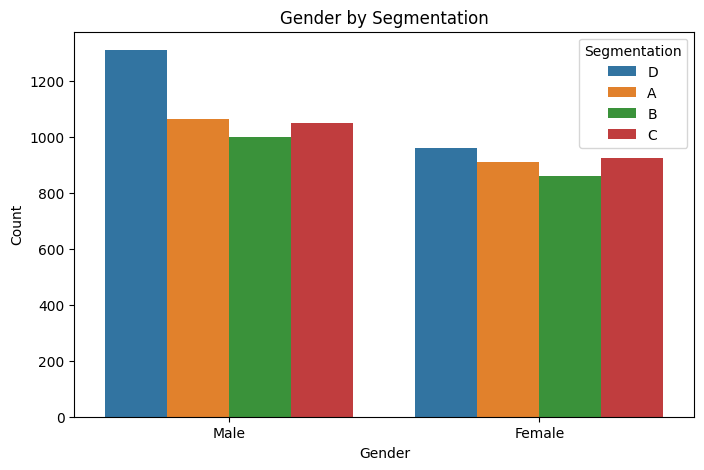

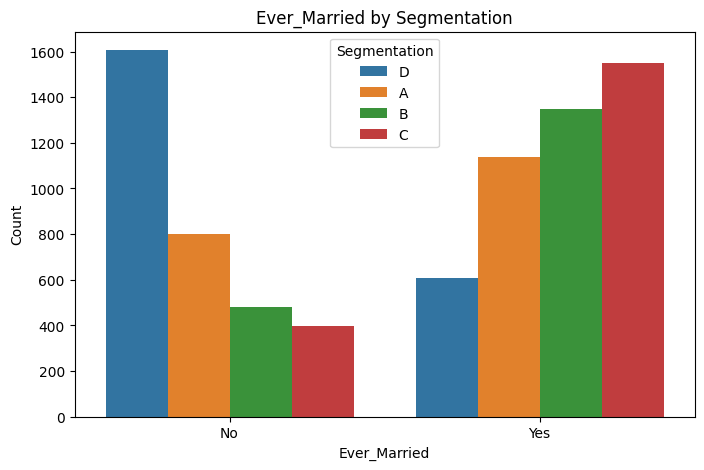

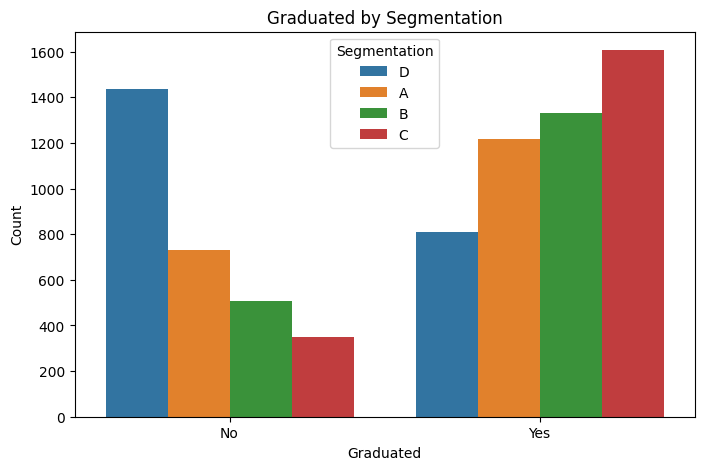

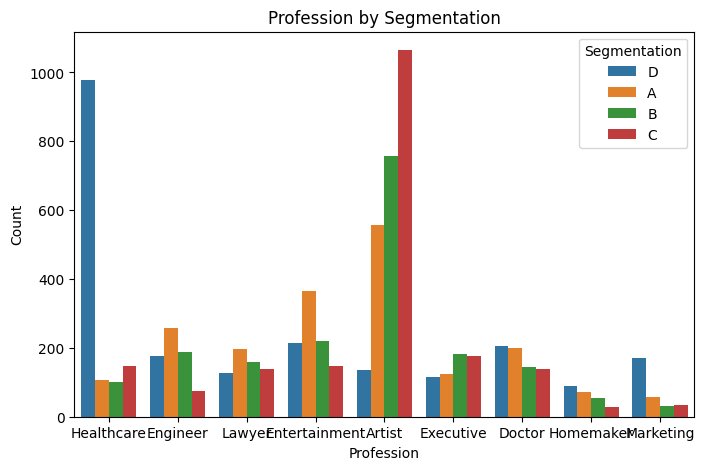

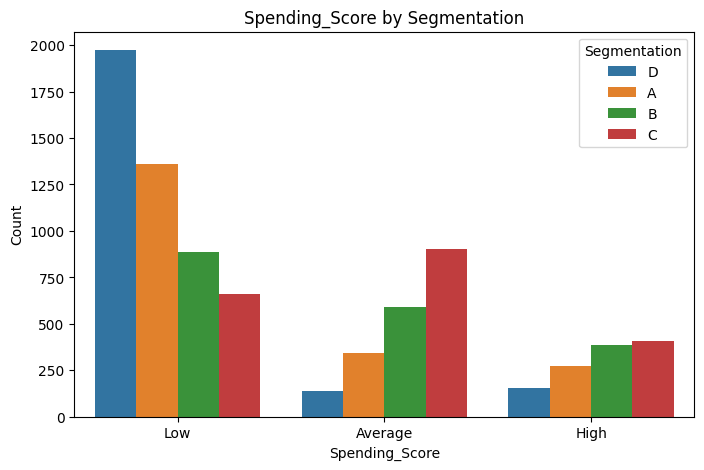

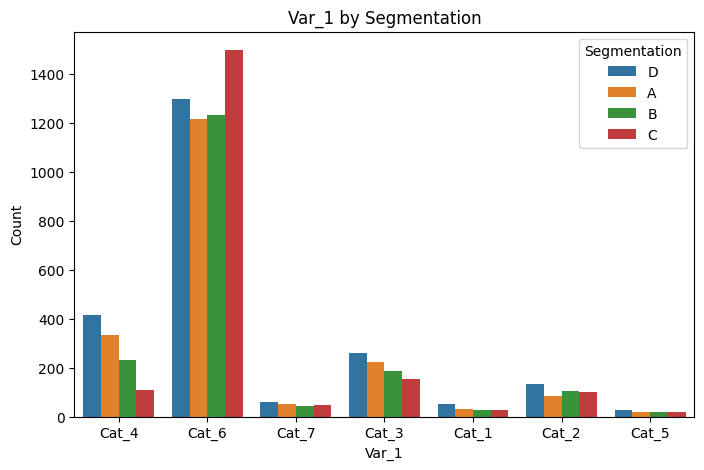

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from .data_preprocess import load_data, preprocess_and_clean_data
import logging

# Configure logging
logging.basicConfig(filename='data_preprocessing.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def explore_data(df):
    """
    Perform exploratory data analysis (EDA) on the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    None
    """
    try:
        # Summary statistics
        logging.info("Summary Statistics:")
        logging.info(df.describe())

        # Data types and missing values
        logging.info("\nData Types and Missing Values:")
        logging.info(df.info())

        # Distribution of categorical variables
        categorical_columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Segmentation"]
        for col in categorical_columns:
            logging.info("\nDistribution of %s", col)
            logging.info(df[col].value_counts())

        # Distribution of numerical variables
        numerical_columns = ["Age", "Work_Experience", "Family_Size"]
        for col in numerical_columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()

        # Correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

        # Box plots for numerical variables by Segmentation
        for col in numerical_columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x="Segmentation", y=col, data=df)
            plt.title(f"{col} by Segmentation")
            plt.xlabel("Segmentation")
            plt.ylabel(col)
            plt.show()

        # Countplot for categorical variables by Segmentation
        for col in categorical_columns[:-1]:  # Exclude "Segmentation" from categorical columns
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, hue="Segmentation", data=df)
            plt.title(f"{col} by Segmentation")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.legend(title="Segmentation")
            plt.show()

    except Exception as e:
        logging.error(f"An error occurred during data exploration: {str(e)}")
        raise Exception(f"An error occurred during data exploration: {str(e)}")

if __name__ == "__main__":
    try:
        # Load the dataset
        df = load_data("sample_data/Train.csv")

        df_clean_preprocessed = preprocess_and_clean_data(df_train.copy())

        # Perform exploratory data analysis (EDA)
        explore_data(df_clean_preprocessed)
    except Exception as e:
        logging.error(f"Error: {str(e)}")


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report




# Load your data
# Preprocess and clean the data
df = preprocess_and_clean_data(load_data("sample_data/Train.csv")).drop(columns='ID')

# Assuming df is your DataFrame
y = df.pop('Segmentation')
X = df

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'Work_Experience', 'Family_Size']),
        ('cat', categorical_transformer, ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])])

# Define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Preprocessing of training data, fit model
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_test)


# Evaluate the model
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           A       0.42      0.49      0.45       394
           B       0.39      0.22      0.28       372
           C       0.49      0.58      0.53       394
           D       0.67      0.69      0.68       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614



In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

# Assuming preprocess_and_clean_data and load_data functions are defined elsewhere and correctly handle the data

# Load and preprocess the data
df = preprocess_and_clean_data(load_data("sample_data/Train.csv")).drop(columns='ID')

y = df.pop('Segmentation')
X = df

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'Work_Experience', 'Family_Size']),
        ('cat', categorical_transformer, ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])])

# Define the models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf_model = RandomForestClassifier(n_estimators=100)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now use y_encoded for train-test split and fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0, stratify=y_encoded)

from sklearn.model_selection import GridSearchCV

# Assuming all previous imports and steps remain the same

# Update pipelines to include the model as part of the pipeline definition
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier())])

# Define parameter grid for each model, prefixing model parameters with 'model__'
xgb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10]
}

# Setup grid search for each model using the correct pipelines
xgb_grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_param_grid, cv=3, scoring='accuracy')
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
xgb_grid_search.fit(X_train, y_train)
best_xgb_pipeline = xgb_grid_search.best_estimator_

rf_grid_search.fit(X_train, y_train)
best_rf_pipeline = rf_grid_search.best_estimator_

# Define the voting classifier with the best estimators
voting_clf = VotingClassifier(estimators=[('xgb', best_xgb_pipeline), ('rf', best_rf_pipeline)], voting='soft')

# Fit the voting classifier with the fine-tuned models
voting_clf.fit(X_train, y_train)

# Make predictions with the fine-tuned voting classifier
preds = voting_clf.predict(X_test)

# Evaluate the fine-tuned model
print(classification_report(y_test, preds))



              precision    recall  f1-score   support

           0       0.43      0.49      0.46       394
           1       0.40      0.32      0.36       372
           2       0.58      0.57      0.58       394
           3       0.67      0.71      0.69       454

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.53      0.53      0.53      1614

